### Consigna 1 -

Queremos demostrar que si se cumple la siguiente igualdad:

$$
(\mathbf{I - A})^{-1} = \mathbf{I} + \mathbf{A} + \mathbf{A^{2}} + \ldots + \mathbf{A^{n}} + \ldots
$$

Entonces vale que:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = 0
$$

Definimos:

$$
S_n = \mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}
$$

Multiplicando a izquierda a ambos lados por $(\mathbf{I - A})$, tenemos:

$$
(\mathbf{I - A}) S_n = (\mathbf{I - A}) \left(\mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}\right)
$$

De aquí obtenemos:

$$
(\mathbf{I - A}) S_n = \mathbf{I} - \mathbf{A^{n+1}}
$$

Por lo tanto, podemos expresar:

$$
\mathbf{A^{n+1}} = \mathbf{I} - (\mathbf{I - A}) S_n
$$

Ahora calculemos $\lim_{n \to \infty} \mathbf{A}^{n+1}$

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\mathbf{I - A}) S_n 
$$

Por álgebra de límites:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\lim_{n \to \infty}(\mathbf{I - A}) . \lim_{n \to \infty} S_n) 
$$

Como suponemos que $(\mathbf{I - A})^{-1} = \lim_{n \to \infty} S_n$, llegamos a:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \mathbf{I} - (\mathbf{I - A} . \mathbf{I - A})^{-1}) = 0
$$



### Consigna 2 -


In [1]:
import sys
!{sys.executable} -m pip install scikit-learn


import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from funcionesTP1 import *

In [2]:
!{sys.executable} -m pip install seaborn
import seaborn as sns

In [3]:
#Definimos las matrices:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)

In [4]:
#Definimos función para calcular los vectores:

def vector_generator(A, n):
    v = np.zeros(n)
    
    for i in range (n):
        A_elev = elevar_matriz(A, i+1 )
        v[i] = np.linalg.norm(A_elev, 2)
    
    return v

def elevar_matriz (A, n):
    res = np.eye(np.shape(A)[0])

    for i in range (n):
        res = res @ A

    return res 

In [5]:
#Generamos los vectores pedidos:
a1 = vector_generator(A1,250)

a2 = vector_generator(A2, 250)

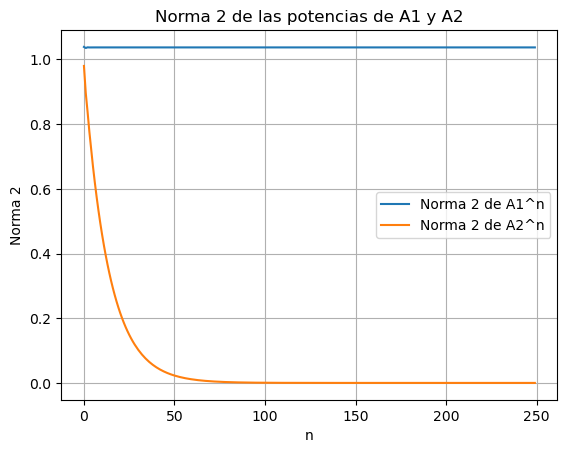

In [6]:
#Grafico:

plt.figure()
plt.plot(a1, label='Norma 2 de A1^n')
plt.plot(a2, label='Norma 2 de A2^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

### Consigna 3 -

In [7]:
#Primero definimos una función que realice el método de la potencia aplicando el método de Monte Carlo.

def metodo_potencia_MonteC(A,n):
    autovals_arr = np.zeros(n)

    for i in range (n):
        autovals_arr[i], _ = metodo_potencia(A)

    media = np.mean(autovals_arr)
    desvio_estandar = np.std(autovals_arr)

    return media, desvio_estandar


In [8]:
#Calculo Autovalores de A1 y A2

#A1:
a1, ds1 = metodo_potencia_MonteC(A1,250)
print(f'autovalor más grande de A1 y desvio estandar :{a1}, {ds1}')


#A2
a2, ds2 = metodo_potencia_MonteC(A2,250)
print(f'autovalor más grande de A2 y desvio estandar :{a2}, {ds1}')

#chequeo
#np.linalg.eigvals(A1)
#np.linalg.eigvals(A2)

autovalor más grande de A1 y desvio estandar :1.0000001143200306, 9.390278231776541e-07
autovalor más grande de A2 y desvio estandar :0.927651317890005, 9.390278231776541e-07


### Consigna 4 -


La ecuacion (4) es 

$$
\ (I-A)^{-1} = I + A + A^{2} + ... + A^{n} + ...
$$

In [10]:

def serie_de_potencias(A,n): #tal vez ineficiente, pero no me importa juaaaaaaa
    dim=np.shape(A)[0]
    
    v = np.zeros(n)
    e=np.zeros(n)

    L,U,P= calcularLU(np.eye(dim)-A)

    ImenosA_inversa=inversaLU(L, U, P)


    for i in range(n):
        serie= suma_potencias(A,i)
        v[i]=np.linalg.norm(serie, 2)
        e[i]=np.linalg.norm(serie-ImenosA_inversa,2)
    

    return v, e

    
    
def suma_potencias(A,n):
    dim=np.shape(A)[0]
    
    v = np.zeros(n+1)
    I = np.eye(dim)

    if n!=0:
        return elevar_matriz(A,n) + suma_potencias(A,n-1)
    else:
        return I


vA1,errorvA1=serie_de_potencias(A1,10)

vA2,errorvA2=serie_de_potencias(A2,10)

vA1_100,errorvA1_100=serie_de_potencias(A1,100)

vA2_100,errorvA2_100=serie_de_potencias(A2,100)

#print(errorvA2_100)



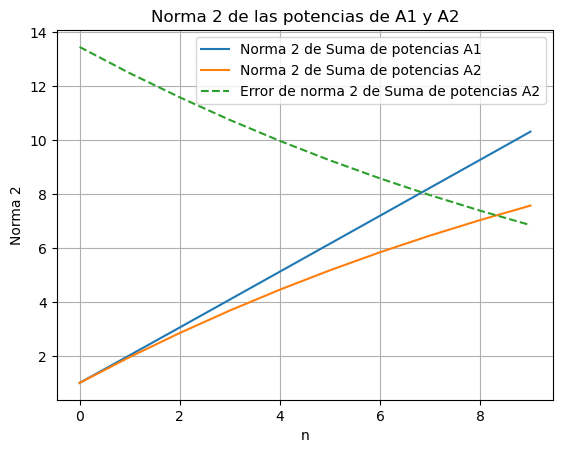

In [11]:
#Grafico para n=10:

plt.figure()
plt.plot(vA1, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

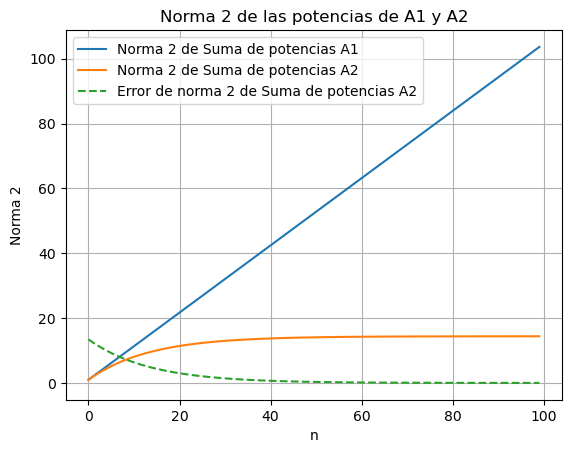

In [12]:
#Grafico para n=100:

plt.figure()
plt.plot(vA1_100, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2_100, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2_100, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

(b) Podemos obvservar que, mientras que A2 converge a un valor cercano a 17, la serie de potencias de A1 diverge. (c) Con los datos que tenemos, pareciese que la convergencia de la serie de potencias esta relacionado con que la matriz elevada a la n (su norma) tienda a 0 cuando n tiende a infiinito y que el módulo de los autovectores sea menor a 1.


###     Consigna 5 -

#### Cálculo autovalores de APP y ASS.

In [13]:
#APP:

APP_arr = APP.to_numpy()

a_PP,ds= metodo_potencia_MonteC(APP_arr,250)

print(f'Mayor autovalor de APP: {a_PP}')

#ASS

ASS_arr = ASS.to_numpy()

a_SS,ds= metodo_potencia_MonteC(ASS_arr,250)

print(f'Mayor autovalor de ASS: {a_SS}')

#chequeo
#np.linalg.eigvals(APP)
#np.linalg.eigvals(ASS)

Mayor autovalor de APP: 0.2826560916156682
Mayor autovalor de ASS: 0.26326704529211065


#### Calculamos vectores con la norma de la matriz elevada a i en la posición i y lo graficamos

In [14]:
a1 = vector_generator(APP_arr,250)

a2 = vector_generator(ASS_arr, 250)

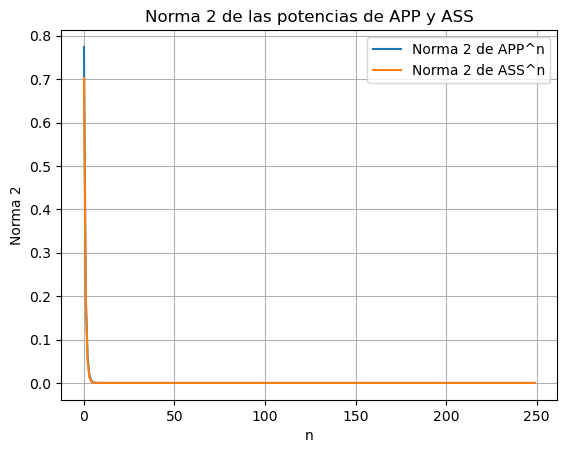

In [15]:
#Grafico de Normas.
plt.figure()
plt.plot(a1, label='Norma 2 de APP^n')
plt.plot(a2, label='Norma 2 de ASS^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar que las las normas de las matrices elevadas tienden a 0 a medida que aumenta el n y el módulo de los autovectores es menor a 1. Por lo tanto,
según el argumento dado en el Punto 4, la serie de potencias convergerá.

#### Ahora calculamos y graficamos la serie de potencias.

In [16]:
#Primero calculamos los vectores con la serie de potencia hasta n en cada coordenada.

vAPP_100,errorvAPP_100=serie_de_potencias(APP_arr,100)

vASS_100,errorvASS_100=serie_de_potencias(ASS_arr,100)

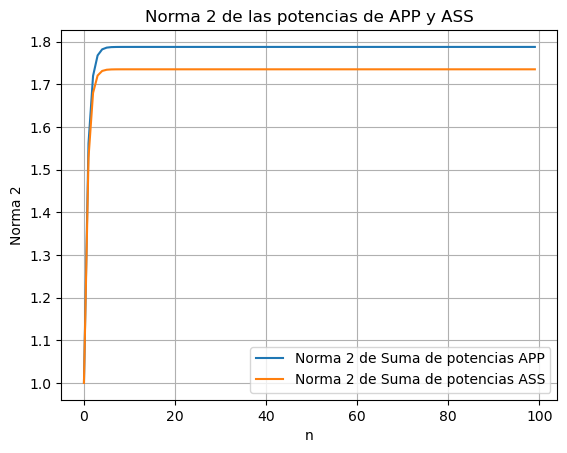

In [17]:
#Grafico:

plt.figure()
plt.plot(vAPP_100, label='Norma 2 de Suma de potencias APP')
plt.plot(vASS_100, label='Norma 2 de Suma de potencias ASS')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar en el gráfico que la suma de potencias converge.

### Consigan 6 -

$$
E_{n} = \begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1-\frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1-\frac{1}{n}
\end{bmatrix} \in \mathbb{R}^{n \times n}
$$

$\underline{\text{Ítem a:}}$

Notamos que $E_{n}$ es una matriz con todos sus elementos negativos, salvo los de la diagonal:

$$
E_{n}z =
\begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1 - \frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1 - \frac{1}{n}
\end{bmatrix}
\begin{bmatrix}
z_{1} \\
z_{2} \\
\vdots \\
z_{n}
\end{bmatrix} =
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{bmatrix}
$$

$$
x_{1} = \left(1 - \frac{1}{n}\right) z_{1} - \frac{1}{n} \left(\sum_{i=2}^{n} z_{i}\right)
$$

$$
x_{2} = -\frac{1}{n} z_{1} + \left(1 - \frac{1}{n}\right) z_{2} - \frac{1}{n} \left(\sum_{i=3}^{n} z_{i}\right)
$$

$$
x_{i} = -\frac{1}{n} \left(\sum_{j=1}^{i-1} z_{j}\right) + \left(1 - \frac{1}{n}\right) z_{i} - \frac{1}{n} \left(\sum_{j=i+1}^{n} z_{j}\right) = z_{i} - \frac{1}{n} \left(\sum_{j=1}^{n} z_{j}\right)
$$

Luego, el promedio de los elementos de $E_{n}z$ es:

$$
\frac{\sum_{i=1}^{n}\left(z_{i} - \frac{\sum_{j=1}^{n} z_{j}}{n}\right)}{n} =
$$

$$
\frac{\sum_{i=1}^{n} z_{i} - \sum_{i=1}^{n} \left(\frac{\sum_{j=1}^{n} z_{j}}{n}\right)}{n} =
$$

$$
\frac{\sum_{i=1}^{n} z_{i} - \sum_{i=1}^{n} \left(\frac{1}{n}\right) \sum_{j=1}^{n} z_{j}}{n} =
$$

$$
\frac{\sum_{i=1}^{n} z_{i} - \sum_{i=1}^{n} z_{i}}{n} = \frac{0}{n}=0
$$

Sea $A$ una matriz cualquiera, $A \in \mathbb{R}^{n \times n}$.

Ahora vemos qué efecto tiene $E_{n}A$ sobre $A$:

$$
E_{n}A = 
\begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1 - \frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1 - \frac{1}{n}
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}
$$

El promedio de las columnas es 0.

$E_{n}$ es un proyector.




$\underline{\text{Ítem b:}}$

Notamos que:

$\lambda = 1$ es un autovalor, pues:
$$
E_{n} - I = \begin{bmatrix}
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n}
\end{bmatrix}
$$

Tomamos $\{d_2, \ldots, d_n\}$ como una base de $\langle e \rangle^{\perp}$, tal que
$$
d_{i} = \begin{bmatrix}
-1\\
0\\
\vdots\\
1\\
0\\
\vdots\\
0
\end{bmatrix} \quad \longrightarrow \text{ posición } i,
$$
para $2 \leq i \leq n$.

Luego, para cada $i$:
$$
(E_{n} - I)d_{i} = 
\begin{bmatrix}
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n}
\end{bmatrix} 
\begin{bmatrix}
-1\\
0\\
\vdots\\
1\\
0\\
\vdots\\
0
\end{bmatrix} = 
\begin{bmatrix}
\frac{1}{n} - \frac{1}{n} \\
\frac{1}{n} - \frac{1}{n} \\
\vdots \\
\frac{1}{n} - \frac{1}{n}
\end{bmatrix} = 
\begin{bmatrix}
0\\
0\\
\vdots\\
0
\end{bmatrix}
$$

$\Rightarrow E_{\lambda=1} = \langle d_2, \ldots, d_n \rangle$, espacio de dimensión $n-1$.

Para $\lambda = 0$, tenemos:
$$
E_{n} 
\begin{bmatrix}
1\\
1\\
\vdots\\
1
\end{bmatrix} =
\begin{bmatrix}
1 - \frac{1}{n} \sum_{i=1}^{n} 1 \\
1 - \frac{1}{n} \sum_{i=1}^{n} 1 \\
\vdots \\
1 - \frac{1}{n} \sum_{i=1}^{n} 1
\end{bmatrix} =
\begin{bmatrix}
0\\
0\\
\vdots\\
0
\end{bmatrix}
$$

$\Rightarrow E_{\lambda=0} = \langle (1, 1, \ldots, 1) \rangle$, espacio de dimensión 1.

$\therefore$ Tenemos una base de autovectores de $\mathbb{R}^n$: $B = \{e, d_2, \ldots, d_n\}$, con $e$ asociado a $\lambda = 0$ y $d_{2}, \ldots, d_{n}$ asociados a $\lambda = 1$.





        


$\underline{\text{Ítem c:}}$



Notar que:

  $\forall a_{ij} \in E_{n}, a_{ij}=a_{ji}$

   $\Rightarrow E_{n}=E_{n}^{t}$

   
Luego, $E_{n}$ es una matriz simétrica

Resta ver que:

 $E_{n}$ es un proyector 

 $\Leftrightarrow E_{n}^{2}=E_{n}$

 volviendo a la definición del enunciado 
 $$ E_{n} = I_{n} - \frac{1}{n} ee^{T} $$

 Donde $I_{n} \in \mathbb{R}^{n\times n}$ y $e\in \mathbb{R}^{n}$ un vector columna de todos unos

 Luego, $E_{n}^{2}=(I_{n} - \frac{1}{n} ee^{T})(I_{n} - \frac{1}{n} ee^{T})$

 $$
 = I_{n}^{2}- \frac{1}{n} ee^{T} - \frac{1}{n} ee^{T} + (- \frac{1}{n} ee^{T})^{2}
 $$

 llamo $B=ee^{T}\in \mathbb{R}^{n\times n}$

 $$
 =I_{n}- \frac{1}{n} B - \frac{1}{n} B + (- \frac{1}{n} B)^{2}
 $$

 $$
 = I_{n}- \frac{2}{n} B  + (- \frac{1}{n} B)^{2}
 $$

 Como $B= \begin{bmatrix}
1 & \cdots & 1 \\
1  & \cdots & 1 \\
\vdots  & \ddots & \vdots \\
1  & \cdots & 1
\end{bmatrix}$, $BB=B^{2}=\begin{bmatrix}
n & \cdots & n \\
n  & \cdots & n \\
\vdots  & \ddots & \vdots \\
n  & \cdots & n
\end{bmatrix}$

Retomando, 
$$
 = I_{n}- \frac{2}{n} B  + (- \frac{1}{n} B)^{2}= I_{n}- \frac{2}{n} B  + \frac{1}{n^{2}} nB
 $$

 $$
 =I_{n}- \frac{1}{n} B=I_{n} - \frac{1}{n} ee^{T}=E_{n}
 $$

  Como queriamos.


  Y como además es simétrica, es un proyector ortogonal

$\underline{\text{Ítem d:}}$

i) Falso, no es una matriz ortogonal.

Contraejemplo:

$$
E_{2}=\begin{bmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}
$$
si $E_{2}$ fuese ortogonal, $E_{2}^{2}=I$
pero, $E_{2}^{2}=\begin{bmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}$


ii)Verdadero, pues $E_{n}\begin{bmatrix}
1\\
1\\
\vdots\\
1\\
\end{bmatrix}= \vec{0}$



iii)Falso, no es definida positiva. 

Contraejemplo
$E_{2}$

$$
\begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{2} \\
 \frac{1}{2}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\end{bmatrix}
\begin{bmatrix}
0 \\
0\\
\end{bmatrix}= \vec{0}
$$



iv)Verdadero; pues

traza($E_{n}$)=$\sum_{1}^{n}(1-\frac{1}{n})$=$\sum_{1}^{n}1-\sum_{1}^{n}\frac{1}{n}$=$n-1$




### Consigna 7 -

#### Primero normalizamos la matriz ASS y calculamos la matriz de covarianzas.

In [18]:
#Funcion para generar E_n:

def En_generator(n):
    E_n = np.eye(n) - np.ones((n, n)) * (1/n) 

    return E_n

E40 = En_generator(40)

In [19]:
#Normalizamos y calculamos cov.

ASSnorm = E40 @ ASS_arr

C = ASSnorm.T @ ASSnorm /(40-1)

#### Calculamos los dos primeros autovectores utilizando el Algoritmo de Hotelling.

In [20]:
def Hotelling (A, e):
    a1, v1 = metodo_potenciaH(A, e)

    A_prima = A - a1 * (v1 @ v1.T)
    a2, v2 = metodo_potenciaH(A_prima, e)

    return a1, v1, a2, v2

#### Ahora utilizamos la función Hotelling en C.

In [21]:
lambda1, v1, lambda2, v2 = Hotelling(C, 0.9999)

print(f'Mayor autovalor de C: {lambda1}')
#print(f'Autovector asociado al mayor autovalor de C: {v1}')
print(f'Segundo mayor autovalor de C: {lambda2}')
#print(f'Autovector asociado al segundo mayor autovalor de C: {v2}')

#Chequeo:
#print(np.linalg.eigvals(C))
#print(np.linalg.eigvals(C - lambda1 * (v1 @ v1.T)))

Mayor autovalor de C: 0.010395205451394425
Segundo mayor autovalor de C: 0.003012016066763971


### Consigna 8 -

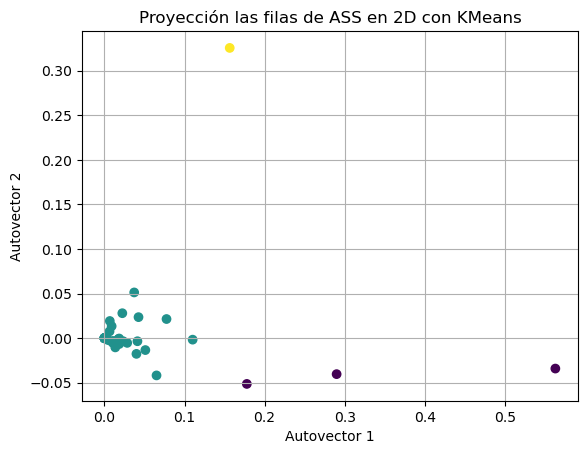

In [45]:
from sklearn.cluster import KMeans


#usamos los autovectores calculados en el punto anterior
autovector1ASS = v1
autovector2ASS = v2

# los convertimos en una matriz de 2x40
matriz2cols = np.column_stack((autovector1ASS, autovector2ASS))

ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccionASS = ASS_arr @ V
#print (proyeccion)

# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccionASS)
#pasamos matriz a df
# Hacer zoom a cada cluster y mostrar gráficos separados

# Graficamos los resultados
plt.grid()
scatter = plt.scatter(proyeccionASS[:, 0], proyeccionASS[:, 1], c=clusters,)

plt.title("Proyección las filas de ASS en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")

plt.show()

    

### CONSIGNA 10

#### Repetimos el analisis del punto 8) con la matriz H

In [28]:

def H_generator(A):
    I=np.eye(40)
    L,U,P = calcularLU(I-A)

    serie= inversaLU(L,U,P)

    H = A@serie 

    return H

H=H_generator(ASS_arr)

In [29]:
#Buscamos los autovectores de H

Hnorm = E40 @ H

lambda1, v1H, lambda2, v2H = Hotelling(Hnorm, 0.9999)

print(f'Mayor autovalor de H: {lambda1}')
#print(f'Autovector asociado al mayor autovalor de C: {v1}')
print(f'Segundo mayor autovalor de C: {lambda2}')
#print(f'Autovector asociado al segundo mayor autovalor de C: {v2}')


Mayor autovalor de H: 0.2430665702588503
Segundo mayor autovalor de C: 0.16785781957747964


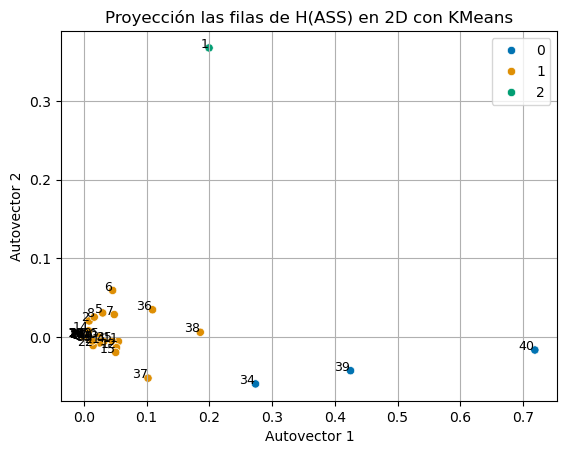

In [40]:
#Usamos los autovectores encontrados
autovector1 = v1H
autovector2 = v2H


ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccion = H @ V
#print (proyeccion)

# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccion)

#pasamos matriz a df
df = pd.DataFrame(proyeccion)
df.columns = ['Columna1', 'Columna2'] + [f'Columna{i+3}' for i in range(38)]


# Graficamos los resultados
#scatter = plt.scatter(proyeccion[:, 0], proyeccion[:, 1], c=clusters)
for i in range(df.shape[0]):
    plt.text(df['Columna1'][i], df['Columna2'][i], f'{i+1}', fontsize=9, ha='right')
sns.scatterplot(data=df,x="Columna1",y="Columna2",hue=clusters,palette="colorblind")
plt.title("Proyección las filas de H(ASS) en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")
plt.grid()


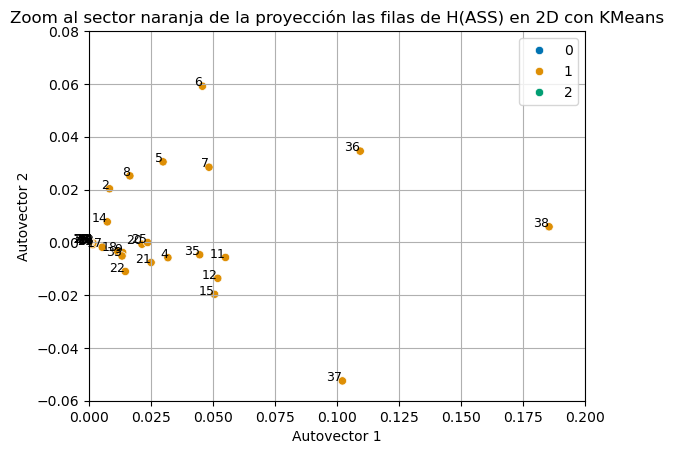

In [39]:
#Hago zoom en el grafico cluster NARANJA

for i in range(1,df.shape[0]-7):
    plt.text(df['Columna1'][i], df['Columna2'][i], f'{i+1}', fontsize=9, ha='right')

for i in range(34,38):
    plt.text(df['Columna1'][i], df['Columna2'][i], f'{i+1}', fontsize=9, ha='right')
sns.scatterplot(data=df,x="Columna1",y="Columna2",hue=clusters,palette="colorblind")
plt.title("Zoom al sector naranja de la proyección las filas de H(ASS) en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")
plt.xlim(0,0.2)
plt.ylim(-0.06,0.08)
plt.grid()

### CONSIGNA 11 -


#### Calculemos las distancias al origen de cada punto de ASS.

In [32]:
distancias_0 = np.linalg.norm(proyeccionASS,axis=1)
#print("La distancia a 0 son:", distancias_0)

indice_max = np.argmax(distancias_0)
indice_min = np.argmin(distancias_0)

print(f'La distancia max es {distancias_0[indice_max]}, de indice {indice_max}.')

print(f'La distancia min es {distancias_0[indice_min]}, de indice {indice_min}.')

#para identificar estos puntos nos tendriamos que sortear a las filas 39 y 2 de ASS, y ver a q insumos se reifeiren

La distancia a 0 son: [3.61108764e-01 2.03188508e-02 0.00000000e+00 2.88976132e-02
 3.57305829e-02 6.32640031e-02 4.85851670e-02 1.61360048e-02
 1.19197798e-02 0.00000000e+00 4.13311852e-02 5.27807521e-02
 2.08365988e-03 9.85017849e-03 4.36706891e-02 1.59937480e-03
 5.16440452e-03 1.08795032e-02 8.26752492e-04 1.73557219e-02
 1.95722282e-02 1.70828378e-02 1.60490238e-03 1.27128699e-03
 1.83378620e-02 0.00000000e+00 3.68275805e-04 0.00000000e+00
 1.89648674e-04 1.69593485e-05 0.00000000e+00 0.00000000e+00
 1.13658441e-02 1.85020193e-01 2.37329460e-02 8.03765623e-02
 7.73136909e-02 1.10104327e-01 2.92608362e-01 5.63879558e-01]
La distancia max es 0.5638795579718763, de indice 39.
La distancia min es 0.0, de indice 2.


#### Graficamos la produccion de ASS y H para los sectores con distancia min y max.

In [33]:
#ASS:
sector_minASS = ASSnorm[2] #Caza y pesca
sector_maxASS = ASSnorm[39] # Servicios a empresas de todo tipo


#H:
sector_minH = Hnorm[2]
sector_maxH = Hnorm[39]

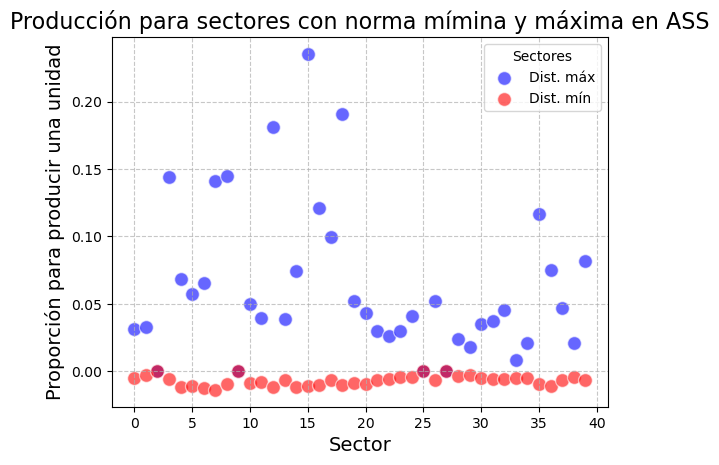

In [41]:
#Graficamos la fila maxima y minima de A:


plt.scatter(range(len(sector_maxASS)),sector_maxASS, c='blue',label='Dist. máx', alpha=0.6, edgecolors='w', s=100)
plt.scatter(range(len(sector_minASS)),sector_minASS, c='red',label='Dist. mín', alpha=0.6, edgecolors='w', s=100)

plt.title('Producción para sectores con norma mímina y máxima en ASS', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Proporción para producir una unidad', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sectores')
plt.show()

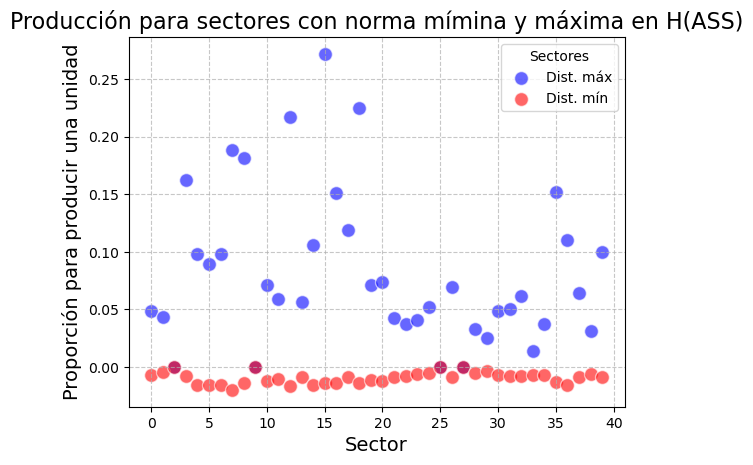

In [42]:
#Ahora para H:


plt.scatter(range(len(sector_maxH)),sector_maxH, c='blue',label='Dist. máx', alpha=0.6, edgecolors='w', s=100)
plt.scatter(range(len(sector_minH)),sector_minH, c='red',label='Dist. mín', alpha=0.6, edgecolors='w', s=100)

plt.title('Producción para sectores con norma mímina y máxima en H(ASS)', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Proporción para producir una unidad', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sectores')
plt.show()

Para el analisis de los sectores usamos las matrices de produccion y H normalizadas, ya que utilizar la matriz normal nos dejaba al sector rojo como una funcion constantemente 0. 
Podemos obvservar en el grafico como el sector rojo esta muy cerca delorigen, mientras que el azul tiene puntos lejanos al 0. Esto se debe que el sector azul depende fuertemente de la produccion de de los demas sectores. Siendo esta area de produccion "otros servicios" nos lleva a pensar que depende de muchos tipos de empresas diferentes, por lo cual la producción de los demas sectores es significativa para el funcionamiento de este. Por otro lado, el sector rojo "mineria (energia)" no necesita de los demas sectores. Deducimos que El Salvador no tiene una gran producción minera, y por lo tanto no necesita de los otros sectores ya que no se lo explota.
Investigando posteriormente, El Salvador prohibio la mineria de metales en 2017!